# Compare MWAS methods for sanity tests and troubleshooting

In version e, we unify the elastic.net functions and make sure 1se and 1min produce different results.

In version f, we try old covariates with all new data for everything else

In version g, we do another quick sanity test with "all" sample methylation data instead of AA.

In version h, we try old covariates, new BSseq data, new everything else. Since we're using old BSseq data, we must change back to Chr 7 for the selected peak for which we have sample data. We got normal results!

In version i, change back to Chr 1 and see if we still get normal results....

In [1]:
chr <- 1 # code set up for old bsseq chr 7, or anything with new bsseq

In [103]:
sites_to_test_pos <- "random"

In [2]:
# Chr 1 sites
sites_to_test_pos <- c(73274305, 73274312, 73292330, 73307769, 73308571, 73419188, 73419830, 73420076)

In [3]:
# # These are the same sites from our test BSsample object on chr 7, and we're extracting these sites from
# # the new bsseq object for the whole chromosome.
# sites_to_test_pos <-
# c(1980077, 1980101, 1980129, 1980136, 1980145, 1980179, 1980183, 1980193, 1980205, 1980239, 
# 1980247, 1980287, 1980291, 1980303, 1980320, 1980326, 1980355, 1980373, 1980390, 1980396, 
# 1980424, 1980430, 1980448, 1980458, 1980464, 1980496, 1980577, 1980581, 1980642, 1980661, 
# 1980787, 1980833, 1980852, 1980860, 1980866, 1980869, 1980893, 1980896, 1980905, 1980933, 
# 1980948, 1980952, 1980997, 1981035, 1981057, 1981111, 1981113, 1981123, 1981186, 1981200, 
# 1981213, 1981219, 1981246, 1981253, 1981262, 1981286, 1981328, 1981352, 1981359, 1981386, 
# 1981410, 1981427, 1981449, 1981479, 1981518, 1981608, 1981613, 1981675, 1981682, 1981958, 
# 1982004, 1982017, 1982035, 1982064, 1982079, 1982246, 1982264, 1982311, 1982357, 1982397, 
# 1982428, 1982488, 1982495, 1982498, 1982500, 1982541, 1982564, 1982583, 1982587, 1982648, 
# 1982740, 1982933, 1983048, 1983077, 1983083, 1983085, 1983105, 1983115, 1983133, 1983135, 
# 1983137, 1983139, 1983141, 1983143, 1983145, 1983147, 1983149, 1983151, 1983153, 1983296, 
# 1983405, 1983484, 1983612, 1983632, 1983694, 1983703, 1983733, 1983747, 1984150, 1984336, 
# 1984422, 1984473, 1984518, 1984556, 1984603, 1984623, 1984705, 1984833, 1984895, 1984908, 
# 1984972, 1985070, 1985172, 1985187, 1985193, 1985231, 1985257, 1985261, 1985292, 1985304, 
# 1985311, 1985342, 1985365, 1985419, 1985445, 1985468, 1985486, 1985521, 1985572, 1985585, 
# 1985591, 1985721, 1985744, 1985751, 1985759, 1985767, 1985825, 1985848, 1985857, 1985872, 
# 1985878, 1985883, 1985906, 1985911, 1985971, 1986087, 1986093, 1986164, 1986194, 1986214, 
# 1986256, 1986268, 1986331, 1986354, 1986377, 1986395, 1986407, 1986410, 1986417, 1986424, 
# 1986443, 1986450, 1986462, 1986465, 1986484, 1986486, 1986495, 1986497, 1986500, 1986519, 
# 1986521, 1986530, 1986532, 1986535, 1986554, 1986556, 1986583, 1986603, 1986624, 1986652, 
# 1986733, 1986784, 1986909, 1986957, 1987071, 1987106, 1987187, 1987226, 1987253, 1987269, 
# 1987319, 1987330, 1987338, 1987363, 1987365, 1987388, 1987395, 1987403, 1987407, 1987413, 
# 1987418, 1987434, 1987449, 1987458, 1987468, 1987492, 1987511, 1987527, 1987565, 1987604, 
# 1987616, 1987627, 1987648, 1987656, 1987659, 1987665, 1987669, 1987680, 1987684, 1987688, 
# 1987697, 1987705, 1987719, 1987725, 1987732, 1987778, 1987797, 1987808, 1987853, 1987858, 
# 1987861, 1987896, 1987910, 1987930, 1988010, 1988039, 1988059, 1988066, 1988078, 1988129, 
# 1988133, 1988141, 1988171, 1988201, 1988216, 1988292, 1988307, 1988321, 1988325, 1988332, 
# 1988401, 1988423, 1988546, 1988580, 1988612, 1988630, 1988634, 1988636, 1988655, 1988662, 
# 1988680, 1988708, 1988718, 1988745, 1988748, 1988776, 1988785, 1988847, 1988874, 1989119, 
# 1989169, 1989183, 1989201, 1989209, 1989218, 1989223, 1989241, 1989249, 1989258, 1989263, 
# 1989275, 1989298, 1989308, 1989332, 1989394, 1989442, 1989451, 1989482, 1989497, 1989500, 
# 1989503, 1989510, 1989527, 1989534, 1989550, 1989605, 1989607, 1989617, 1989622, 1989628, 
# 1989642, 1989658, 1989674, 1989690, 1989754, 1989761, 1989767, 1989793, 1989924, 1989957)

In [4]:
filter_snps <- FALSE # speed things up by pre-filtering whole chromosomes to desired regions

## Be ready with matched up SNP and covariate files

In [5]:
library("glmnet")
library("e1071")
library("doParallel")
library("data.table")

Loading required package: Matrix

Loaded glmnet 4.1-8

Loading required package: foreach

Loading required package: iterators

Loading required package: parallel



In [6]:
df <- fread("09-OUT_matched_SNP_meth_cov_a2.csv")

In [7]:
df <- df[which(df$Chr == chr), ]

In [8]:
df <- df[which(df$population == "all"), ]
df <- df[which(df$brain_region == "caud"), ]

In [9]:
df

Chr,SNP_data,methylation_data,last_meth_value_with_SNP_coverage,first_meth_value_with_SNP_coverage,last_meth_index_with_SNP_coverage,first_meth_index_with_SNP_coverage,subpopulation,brain_region,population,region,cov_file,cov_file2,cov_file3,cov_file4
<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,/expanse/lustre/projects/jhu152/naglemi/mwas/gwas//libd_chr1.pgen,/expanse/lustre/projects/jhu152/naglemi/mwas/pheno/caud/out/chr1_all.rda,248918358,1069461,2202702,8982,all,caud,all,caud,/expanse/lustre/projects/jhu152/naglemi/mwas/full_covariates_a2/all_caud.csv,/expanse/lustre/projects/jhu152/naglemi/mwas/full_covariates_a2/all_caud-no-meth.csv,/expanse/lustre/projects/jhu152/naglemi/mwas/full_covariates_a2/all_caud-no-meth-no-dx.csv,/expanse/lustre/projects/jhu152/naglemi/mwas/full_covariates_a2/all_caud-no-dx.csv


In [10]:
i <- 1

In [11]:
df[1, ]

Chr,SNP_data,methylation_data,last_meth_value_with_SNP_coverage,first_meth_value_with_SNP_coverage,last_meth_index_with_SNP_coverage,first_meth_index_with_SNP_coverage,subpopulation,brain_region,population,region,cov_file,cov_file2,cov_file3,cov_file4
<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,/expanse/lustre/projects/jhu152/naglemi/mwas/gwas//libd_chr1.pgen,/expanse/lustre/projects/jhu152/naglemi/mwas/pheno/caud/out/chr1_all.rda,248918358,1069461,2202702,8982,all,caud,all,caud,/expanse/lustre/projects/jhu152/naglemi/mwas/full_covariates_a2/all_caud.csv,/expanse/lustre/projects/jhu152/naglemi/mwas/full_covariates_a2/all_caud-no-meth.csv,/expanse/lustre/projects/jhu152/naglemi/mwas/full_covariates_a2/all_caud-no-meth-no-dx.csv,/expanse/lustre/projects/jhu152/naglemi/mwas/full_covariates_a2/all_caud-no-dx.csv


In [12]:
set.seed(2018)
wind <- c(10000)
# output directory
#outd <- "/dcl02/lieber/shan/shizhong/finemapping/GWAS/tags/scz3/mwas/chr22/1/"
outd <- "20-OUT_original_mwas_sanity_test/"

## Functions

### Shizhong's original

In [13]:
###### model: learn elastic net model on training data 
######---------Input: trainX, trainY
######---------Return: selected features and coefficents

# original
# elastic.net <- function(trainX,trainY){
#     if(nrow(trainX)!=length(trainY)){
#             stop("Number of observations is differerent")
#     } 

#     # optimize alpha---mixing parameter  
#     a <- 0.5
#     search <- foreach(ai = a, .combine = rbind) %dopar% {
#         cv.fit <- cv.glmnet(
#                         trainX,
#                         trainY,
#                         nfold = 5,
#                         type.measure = "mse",
#                         paralle = TRUE,
#                         alpha = ai
#                         )
#         data.frame(
#                         cvm = min(cv.fit$cvm),
#                         lambda = cv.fit$lambda.min,
#                         alpha = ai
#                         )
#         } 
#     cv.opt <- search[search$cvm == min(search$cvm),] 

#         # fit model by optimized alpha and lambda
#         yfit = glmnet(
#         trainX,
#         trainY,
#         lambda = cv.opt$lambda,
#         alpha = cv.opt$alpha
#                 )       
#         idf <- coef(yfit)
#         idx <- which(idf != 0)
#         selectf <- data.frame(
#                 features = idf@Dimnames[[1]][idx], 
#                 coefs = idf [idx]
#         )
# }

MWAS <- function(gwas, weight, geno){
        z <- gwas %*% weight
        z.cor <- cor(geno)
        se <- sqrt(weight %*%  z.cor %*%  weight)
        z <- z/se
        p=pnorm(abs(z),lower.tail=F)*2
        return(c(z, p))
}

#### Modified `elastic.net` to use `lambda.1se`

In [14]:
# modified to use lambda 1se and appropriate cvm
elastic.net <- function(trainX,trainY, lambda.choice = "1se"){
    if(nrow(trainX)!=length(trainY)){
            stop("Number of observations is differerent")
    } 

    # optimize alpha---mixing parameter  
    a <- 0.5
    search <- foreach(ai = a, .combine = rbind) %dopar% {
        #set.seed(42)
        cv.fit <- cv.glmnet(
                        trainX,
                        trainY,
                        nfold = 5,
                        type.measure = "mse",
                        parallel = TRUE,
                        alpha = ai
                        )
        #print(paste0("Dim of trainX: ", dim(trainX)))
        #print(paste0("Len of trainY: ", length(trainY)))
        coef_matrix <- as.matrix(coef(cv.fit))

        if(lambda.choice == "1se"){
            chosen_lambda <- cv.fit$lambda.1se
            chosen_cvm <- cv.fit$cvm[cv.fit$lambda == cv.fit$lambda.1se]
        }
        if(lambda.choice == "min"){
            chosen_lambda <- cv.fit$lambda.min
            chosen_cvm <- min(cv.fit$cvm)
        }


        data.frame(
                        cvm = chosen_cvm,
                        lambda = chosen_lambda,
                        alpha = ai
                        )
        } 
    cv.opt <- search[search$cvm == min(search$cvm),] 

        # fit model by optimized alpha and lambda
    #set.seed(42)
    yfit <- glmnet(
    trainX,
    trainY,
    lambda = cv.opt$lambda,
    alpha = cv.opt$alpha)

    idf <- coef(yfit)
    idx <- which(idf != 0)
    selectf <- data.frame(
            features = idf@Dimnames[[1]][idx], 
            coefs = idf [idx]
    )
}

## Replace all old objects with new objects in same format

### Methylation data

In [15]:
suppressWarnings(library(bsseq))

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:data.table’:

    first, second


The following objects are masked from ‘package:Matrix’:

    expand, unname


The following object is masked from ‘package:utils’:

    findMatches


The

In [16]:
# # The code in this block is for NEW methylation data, which can be for any chromosome or portion

# # load data for mwas
# # load("./rda/caudate_mwas_data_chr22.rda")
load(df$methylation_data[i])

p <- getMeth(BSobj2)


rownames(p) <- start(BSobj2)

sites_to_test <- which(start(BSobj2) %in% sites_to_test_pos)
p <- p[sites_to_test, ]
cg <- as.numeric(rownames(p))

Subset our p object to the same sites as the old one, compare values

In [17]:
# # Old dataset
# load("BSsample.rda", verbose = TRUE) # we get the @colData attribute as a data.frame here
# load("p1.rda", verbose = TRUE) # and the p matrix from getMeth() here

# BSobj2 <- BSsample
# cg <- as.numeric(rownames(p)) # This line same whether we use old or new version
# sites_to_test_pos <- cg

### covariates

In [18]:
# The code in this block is for NEW covariate data

# covs <- fread(df$cov_file[i])
# covs <- t(covs)
# colnames(covs) <- covs[1, ]
# covs <- covs[2:nrow(covs), ]
# # transpose so we have same orientation as original code

In [19]:
# This is the OLD covariate data

load("covs_for_meqtl.rda")

### Regress methylation data over covariates

In [20]:
BSobj2$brnum <- gsub("Br0", "Br", BSobj2$brnum)
colnames(covs) <- gsub("Br0", "Br", colnames(covs))

In [21]:
mat <- match(BSobj2$brnum,colnames(covs)) 
covs <- t(covs[,mat])
p.residual=matrix(NA,dim(p)[1],dim(p)[2])

In [22]:
# This is something we only need to do for new covariates
if("genoPC1" %in% colnames(covs)){
    rownames(covs)[is.na(covs[, 'genoPC1'])] <- BSobj2$brnum[is.na(covs[, 'genoPC1'])]
}

In [23]:
colnames(p.residual) <- BSobj2$brnum

In [24]:
covs <- as.data.frame(covs)
# Convert all columns except Dx and Sex from character to numeric
cols_to_convert <- setdiff(names(covs), c("Dx", "Sex"))

for (col in cols_to_convert) {
  covs[[col]] <- as.numeric(covs[[col]])
}

# Print the modified data frame to check the conversion
#print(dat)


In [25]:
for (i in 1:dim(p)[1]) { # For each methylation site
    dat <- as.data.frame(cbind(y = p[i,], covs))
    
    # Check for rows with NAs (the ones for which we don't have covariate data)
    valid_rows <- complete.cases(dat)
    
    if (sum(valid_rows) > 0) {
        dat_valid <- dat[valid_rows,]
        model.res <- lm(y ~ ., data = dat_valid)
        
        # Store residuals in the corresponding positions
        p.residual[i, valid_rows] <- resid(model.res)
    }
}


# for(i in 1:dim(p)[1]){ # foro each methylation site
#         dat <- as.data.frame(cbind(p[i,],covs))
#         colnames(dat) <- c("y",paste0("x",1:ncol(covs)))
#         model.res <- lm(reformulate(paste0("x",1:ncol(covs)), "y"),dat)
#         p.residual[i,] = resid(model.res) 
# }

In [26]:
dim(p.residual)

[1]   8 297

In [27]:
p.residual[1:8, 1:8]

Br1122,Br2285,Br1764,Br1464,Br5062,Br1446,Br1503,Br1946
-0.021772765,0.0171057118,-0.003104411,-0.022536233,-0.01133320,-0.002647317,0.009877743,-0.008847398
-0.021782828,0.0170917413,-0.003157108,-0.022544563,-0.01132870,-0.002673469,0.009870014,-0.008873323
-0.043888182,-0.0118016465,0.055577899,0.029720928,-0.01200909,-0.019514686,0.016255660,0.015087855
0.003365118,-0.0003939154,0.006590394,-0.011596652,0.02840531,0.007325307,0.018569552,0.007050156
-0.008253897,0.0039481671,0.005694935,-0.011469094,0.02967406,0.007227775,0.021167976,0.005467642
0.027927438,0.0146552415,-0.013098449,-0.012031208,0.03458124,0.012633224,-0.017013102,0.013072120
0.032242055,0.0173510674,-0.002920818,-0.010695096,0.03184396,0.017650227,-0.013039197,0.007014169
0.032417897,0.0181280067,0.001116342,-0.008765389,0.02980369,0.018806673,-0.010985107,0.004018753


In [28]:
snp.gwas2 <- NULL

In [29]:
#load("p1.rda", verbose = TRUE)

### summary stats

In [30]:
library(data.table)
library(CpGWAS)

In [31]:
ss_path <- "/home/naglemi/mwas/gwas/gwas_stat_scz"

In [32]:
snp.gwas2 <- fread(ss_path, skip = 1, header = FALSE)
colnames(snp.gwas2) <- strsplit(readLines(ss_path, n = 1), "\t")[[1]]

In [33]:
snp.gwas2$z <- log(snp.gwas2$OR)/snp.gwas2$SE

In [34]:
snp.gwas2 <- snp.gwas2[, c(2, 1, 3, 3, 8, 4, 5, 20, 11)]

In [35]:
head(snp.gwas2, n = 1)

SNP,CHR,BP,BP,INFO,A1,A2,z,P
<chr>,<int>,<int>,<int>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
rs62513865,8,100579985,100579985,0.963,C,T,0.7016221,0.4847


In [36]:
colnames(snp.gwas2)[1:5] <- c("snp", "chr", "pos_hg38", "pos_hg38", "info")

In [37]:
CHR <- chr # to avoid R df local env mixing variables of columns name and subset variable

In [38]:
snp.gwas2 <- snp.gwas2[which(snp.gwas2$chr == CHR), ]

In [39]:
if(filter_snps == TRUE){
    snp.gwas2 <- snp.gwas2[which(snp.gwas2$pos_hg38 >= (min(sites_to_test_pos)-10000) & snp.gwas2$pos_hg38 <= (max(sites_to_test_pos) + 10000)), ]
}

In [40]:
snp.gwas2 <- snp.gwas2[order(snp.gwas2$pos_hg38), ]

In [41]:
# built predition models
idx.ea <- BSobj2$race == "CAUC"

In [42]:
levels(factor(snp.gwas2$chr))

[1] "1"

### SNPs in LIBD population

#### Old dataset

#### New dataset prep: For reference, first load Shizhong's formatted SNPs on Chr7

In [43]:
# load("p1.rda", verbose = TRUE)

# snp2_sorted <- snp2[, order(names(snp2))]

# colnames(snp2) <- gsub("Br0", "Br", colnames(snp2))

# snp2 <- snp2[, colnames(snp2) %in% colnames(p.residual)]

# snp2_positions <- stringr::str_split_fixed(rownames(snp2), ":", 3)[, 2]

#### New dataset: Now let's load ours on Chr1

In [44]:
paths <- list(
  pvar_path = paste0("/expanse/lustre/projects/jhu152/naglemi/mwas/gwas/libd_chr", chr, ".pvar"),
  pgen_path = paste0("/expanse/lustre/projects/jhu152/naglemi/mwas/gwas/libd_chr", chr, ".pgen"),
  psam_path = paste0("/expanse/lustre/projects/jhu152/naglemi/mwas/gwas/libd_chr", chr, ".psam")
)

my_SNPs <- loadSNPData(paths$pvar_path, paths$pgen_path, paths$psam_path)

In [45]:
filter_snps <- TRUE

In [46]:
if(filter_snps == TRUE){
    snp_indices_of_interest <- which(my_SNPs$pvar_dt$POS >= min(sites_to_test_pos)-100000 & my_SNPs$pvar_dt$POS <= max(sites_to_test_pos) + 100000)
}

In [47]:
if(filter_snps == TRUE){
    snp3 <- pgenlibr::ReadList(my_SNPs$pgen,
                               variant_subset = snp_indices_of_interest)
    colnames(snp3) <- my_SNPs$pvar_dt$ID[snp_indices_of_interest]
} else {
    snp3 <- pgenlibr::ReadList(my_SNPs$pgen)
    colnames(snp3) <- my_SNPs$pvar_dt$ID
}

In [48]:
snp3[1:10, 1:10]

chr1:73174446:A:G,chr1:73174844:A:G,chr1:73174997:A:G,chr1:73175231:A:T,chr1:73175257:A:T,chr1:73175318:C:T,chr1:73175341:T:A,chr1:73175376:A:T,chr1:73175403:G:A,chr1:73175846:C:A
0.9970093,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1.9970093,1.9959717
0.0000000,2.0000000,2.0000000,2.0000000,2.0000000,2.0000000,2.0000000,2.0000000,0.0000000,0.0000000
0.0000000,2.0000000,2.0000000,2.0000000,2.0000000,2.0000000,2.0000000,2.0000000,0.0000000,0.0000000
0.9970093,0.9970093,0.9970093,0.9970093,0.9970093,0.9970093,0.9970093,0.9970093,0.9970093,0.9970093
1.9739990,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1.9739990,1.9730225
0.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000
0.0000000,2.0000000,2.0000000,2.0000000,2.0000000,2.0000000,2.0000000,2.0000000,0.0000000,0.0000000
2.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,2.0000000,2.0000000
0.0000000,2.0000000,2.0000000,2.0000000,2.0000000,2.0000000,2.0000000,2.0000000,0.0000000,0.0000000
2.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,2.0000000,2.0000000


In [49]:
rownames(snp3) <- my_SNPs$psam$`#IID`

In [50]:
map3 <- data.frame(POS = stringr::str_split_fixed(colnames(snp3), ":", 3)[, 2])

In [51]:
snp3 <- t(snp3)

In [52]:
map3 <- data.frame(POS = stringr::str_split_fixed(rownames(snp3), ":", 3)[, 2])

In [53]:
dim(map3)

[1] 652   1

### SNPs in reference population

In [54]:
#snp.1kg.eur2

In [55]:
paths <- list(
  pvar_path = paste0("/expanse/lustre/projects/jhu152/naglemi/mwas/gwas/ref_EUR_chr", chr, ".pvar"),
  pgen_path = paste0("/expanse/lustre/projects/jhu152/naglemi/mwas/gwas/ref_EUR_chr", chr, ".pgen"),
  psam_path = paste0("/expanse/lustre/projects/jhu152/naglemi/mwas/gwas/ref_EUR_chr", chr, ".psam")
)

my_SNPs <- loadSNPData(paths$pvar_path, paths$pgen_path, paths$psam_path)

In [56]:
if(filter_snps == TRUE){
    snp_indices_of_interest <- which(my_SNPs$pvar_dt$POS >= min(sites_to_test_pos)-10000 & my_SNPs$pvar_dt$POS <= max(sites_to_test_pos) + 10000)
}

In [57]:
snp.1kg.eur2 <- pgenlibr::ReadList(my_SNPs$pgen,
                        variant_subset = snp_indices_of_interest)
colnames(snp.1kg.eur2) <- my_SNPs$pvar_dt$ID[snp_indices_of_interest]
rownames(snp.1kg.eur2) <- my_SNPs$psam$`IID`

In [58]:
map.1kg.eur2 <- my_SNPs$pvar_dt

In [59]:
map.1kg.eur2 <- map.1kg.eur2[snp_indices_of_interest, ]

In [60]:
snp.1kg.eur2 <- t(snp.1kg.eur2)

### Set window size and any other parameters

In [61]:
wind <- 10000

Is 1se vs min for lambda the problem?

#### Final formatting steps to prepare for MWAS - sort samples

In [62]:
p.residual <- p.residual[, order(colnames(p.residual))]

In [63]:
snp3 <- snp3[, colnames(snp3) %in% colnames(p.residual)]

In [64]:
snp3 <- snp3[, order(colnames(snp3))]

## MWAS

### With `lambda.1se`

#### Stage 1

Quick debug: A version to see why we end up with empty `models.aa` and `models.ea`

In [65]:
set.seed(42)
for(k in 1:length(wind)){
    models.ea <- c()
    models.all <- c()
    for(i in 1:length(cg)){
    #for(i in 1){
            #cat(i,"\n")
            #print(paste0("This cg is: ", cg[i]))
            range1 <- ifelse(cg[i] - wind[k] > 0,cg[i] - wind[k],0)
            range2 <- cg[i] + wind[k]
            idx <- map3$POS > range1 & map3$POS < range2
            # go to next cg if no snps within window
            if(sum(idx) <= 1){
                    next
            }
            geno <- snp3[idx,] # changed snp2 to snp3
            rownames(geno) <- map3$POS[idx]
            trainX <- t(geno)
            trainY <- p.residual[i,]
            #fit <- elastic.net(trainX,trainY, "1se")
            fit <- tryCatch(
                    elastic.net(trainX,trainY, "1se"),
                    error = function(e) {return ("err")})
            if(!is.data.frame(fit)){
                if(fit == "err"){
                    next
                }
            }
            if(nrow(fit) == 0) next

            fit$cg <- cg[i]
            models.all <- rbind(models.all,fit)
            # EA only
            trainX <- trainX[idx.ea,]
            if(sum(apply(trainX,2,var)!=0) <= 1){
                    next
            }
            trainY <- trainY[idx.ea]
            fit <- tryCatch(
                    elastic.net(trainX,trainY, "1se"),
                    error = function(e) {return ("err")})
            if(!is.data.frame(fit)){
                if(fit == "err"){
                    next
                }
            }
            if(nrow(fit) == 0) next
            fit$cg <- cg[i]
            models.ea <- rbind(models.ea,fit)
    }
}

Warning message:
“executing %dopar% sequentially: no parallel backend registered”


In [66]:
models.ea <- models.ea[models.ea[,1] != "(Intercept)",]
models.all <- models.all[models.all[,1] != "(Intercept)",]

#### Stage 2

In [67]:
if(!dir.exists(outd)) dir.create(outd)

In [68]:
set.seed(42)
# mwas by models of all samples
cg2 <- unique(models.all$cg)
mwas.all <- matrix(0,nrow=length(cg2),ncol=2)

for(i in 1:length(cg2)){
    pos <- models.all[models.all$cg == cg2[i],1]
    gwas <- snp.gwas2$z[is.element(snp.gwas2$pos_hg38, pos)]
    weight <- models.all[models.all$cg == cg2[i],2]
    #geno <- snp.1kg.eur2[match(pos,map.1kg.eur2$POS),]

    match_indices <- match(pos, map.1kg.eur2$POS)

    tryCatch({
        geno <- snp.1kg.eur2[match_indices, , drop = FALSE]
    }, error = function(e) {
        cat("Error accessing genotype data at iteration:", i, "\n")
        cat("Error message:", e$message, "\n")
        stop("Stopping execution due to error.")
    })

    tryCatch({
        mwas.all[i,] <- MWAS(gwas, weight, t(geno))
    }, error = function(e) {
        cat("Error at iteration:", i, "\n")
        cat("cg2[i]:", cg2[i], "\n")
        cat("gwas:\n")
        print(gwas)
        cat("weight:\n")
        print(weight)
        stop(e)
    })
}

rownames(mwas.all) <- cg2
colnames(mwas.all) <- c("z","p")

In [69]:
i

[1] 7

In [70]:
pos

[1] "73412206" "73414606" "73416795" "73417197" "73419155" "73422680"
 [7] "73423542" "73423762" "73424910" "73425398" "73426069" "73426204"
[13] "73426737" "73426896" "73426930" "73427141" "73428382" "73428467"
[19] "73428699" "73428776" "73428961"

In [71]:
gwas

[1] 1.629355 1.637326 8.340812 6.736488 8.318635 1.644571 1.644571 1.651815
 [9] 6.736488 1.403688 1.659059 7.116113 7.105175 7.116113 7.116113 7.116113
[17] 7.105175 7.116113 1.659059 7.105175 1.659059

In [72]:
length(pos)

[1] 21

In [73]:
length(gwas)

[1] 21

In [74]:
models.all[models.all$cg == cg2[i], ]

,features,coefs,cg
,<chr>,<dbl>,<dbl>
92,73412206,-0.002580545,73420076
93,73414606,-0.002441482,73420076
94,73416795,-0.003154431,73420076
95,73417197,-0.001068469,73420076
96,73419155,-0.003119043,73420076
97,73422680,-0.002315353,73420076
98,73423542,-0.002444605,73420076
99,73423762,-0.002658546,73420076
100,73424910,-0.002202422,73420076


In [75]:
snp.gwas2[is.element(snp.gwas2$pos_hg38, pos), ]

snp,chr,pos_hg38,pos_hg38,info,A1,A2,z,P
<chr>,<int>,<int>,<int>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
rs74091844,1,73412206,73412206,1.000,C,T,1.629355,1.021e-01
rs12136189,1,73414606,73414606,1.000,G,C,1.637326,1.012e-01
rs1475064,1,73416795,73416795,0.999,A,G,8.340812,5.322e-17
rs1475065,1,73417197,73417197,0.997,A,G,6.736488,1.580e-11
rs12731986,1,73419155,73419155,0.998,C,T,8.318635,6.251e-17
rs12116741,1,73422680,73422680,1.000,A,G,1.644571,9.947e-02
rs13376104,1,73423542,73423542,1.000,G,A,1.644571,9.981e-02
rs12144054,1,73423762,73423762,1.000,T,C,1.651815,9.838e-02
rs11210238,1,73424910,73424910,0.997,G,A,6.736488,1.546e-11


In [76]:
# Why do we get non-conformable arguments for iteration 57?

In [77]:
weight

[1] -0.002580545 -0.002441482 -0.003154431 -0.001068469 -0.003119043
 [6] -0.002315353 -0.002444605 -0.002658546 -0.002202422 -0.001215870
[11] -0.002799286 -0.002118333 -0.002157530 -0.002080705 -0.001966957
[16] -0.001914716 -0.001982475 -0.001952044 -0.002535315 -0.001973801
[21] -0.002342355

In [78]:
length(weight)

[1] 21

In [79]:
gwas

[1] 1.629355 1.637326 8.340812 6.736488 8.318635 1.644571 1.644571 1.651815
 [9] 6.736488 1.403688 1.659059 7.116113 7.105175 7.116113 7.116113 7.116113
[17] 7.105175 7.116113 1.659059 7.105175 1.659059

In [80]:
length(gwas)

[1] 21

In [81]:
head(gwas)

[1] 1.629355 1.637326 8.340812 6.736488 8.318635 1.644571

In [82]:
head(map3)

,POS
,<chr>
1,73174446
2,73174844
3,73174997
4,73175231
5,73175257
6,73175318


In [83]:
head(geno)

,HG00096,HG00097,HG00099,HG00101,HG00102,HG00103,HG00105,HG00107,HG00108,HG00109,⋯,NA20814,NA20815,NA20818,NA20819,NA20821,NA20822,NA20826,NA20827,NA20828,NA20832
rs74091844,0,1,0,1,1,0,0,0,0,0,⋯,0,0,0,0,0,0,1,0,1,0
rs12136189,0,1,0,1,1,0,0,0,0,0,⋯,0,0,0,0,0,0,1,0,1,0
rs1475064,1,1,0,0,0,0,0,1,0,1,⋯,2,2,1,2,2,2,0,1,1,1
rs1475065,1,1,0,0,0,0,0,1,0,1,⋯,1,2,1,1,1,1,0,1,1,1
rs12731986,1,1,0,0,0,0,0,1,0,1,⋯,2,2,1,2,2,2,0,1,1,1
rs12116741,0,1,0,1,1,0,0,0,0,0,⋯,0,0,0,0,0,0,1,0,1,0


In [84]:
# mwas by models of EA samples
cg2 <- unique(models.ea$cg)
mwas.ea <- matrix(0,nrow=length(cg2),ncol=2)
for(i in 1:length(cg2)){
        pos <- models.ea[models.ea$cg == cg2[i],1]
        gwas <- snp.gwas2$z[is.element(snp.gwas2$pos_hg38, pos)]
        weight <- models.ea[models.ea$cg == cg2[i],2]
        #geno <- snp.1kg.eur2[match(pos,map.1kg.eur2$POS),]

        match_indices <- match(pos, map.1kg.eur2$POS)

        tryCatch({
            geno <- snp.1kg.eur2[match_indices, , drop = FALSE]
        }, error = function(e) {
            cat("Error accessing genotype data at iteration:", i, "\n")
            cat("Error message:", e$message, "\n")
            stop("Stopping execution due to error.")
        })    
    
        mwas.ea[i,] <- MWAS(gwas, weight, t(geno))
}
rownames(mwas.ea) <- cg2
colnames(mwas.ea) <- c("z","p")

In [85]:
head(mwas.all)

,z,p
73274312,16.25882,1.934153e-59
73292330,40.70283,0.000000e+00
73307769,-15.88332,8.268615e-57
73308571,-35.61695,7.658389e-278
73419188,-46.19352,0.000000e+00
73419830,-37.67143,0.000000e+00


In [86]:
mwas.all.1se <- mwas.all

### With `lambda.min`

#### Stage 1

In [87]:
set.seed(42)
for(k in 1:length(wind)){
    models.ea <- c()
    models.all <- c()
    for(i in 1:length(cg)){
    #for(i in 1){
        #cat(i,"\n")
        #print(paste0("This cg is: ", cg[i]))
        range1 <- ifelse(cg[i] - wind[k] > 0,cg[i] - wind[k],0)
        range2 <- cg[i] + wind[k]
        idx <- map3$POS > range1 & map3$POS < range2
        # go to next cg if no snps within window
        if(sum(idx) <= 1){
                next
        }
        geno <- snp3[idx,] # changed snp2 to snp3
        rownames(geno) <- map3$POS[idx]
        trainX <- t(geno)
        trainY <- p.residual[i,]
        fit <- elastic.net(trainX,trainY)
        fit <- tryCatch(
                elastic.net(trainX,trainY, "min"),
                error = function(e) {return ("err")})
        if(!is.data.frame(fit)){
            if(fit == "err"){
                next
            }
        }
        if(nrow(fit) == 0) next

        fit$cg <- cg[i]
        models.all <- rbind(models.all,fit)
        # EA only
        trainX <- trainX[idx.ea,]
        if(sum(apply(trainX,2,var)!=0) <= 1){
                next
        }
        trainY <- trainY[idx.ea]
        fit <- tryCatch(
                elastic.net(trainX,trainY, "min"),
                error = function(e) {return ("err")})
        if(!is.data.frame(fit)){
            if(fit == "err"){
                next
            }
        }
        if(nrow(fit) == 0) next
        fit$cg <- cg[i]
        models.ea <- rbind(models.ea,fit)
    }
}

In [88]:
models.ea <- models.ea[models.ea[,1] != "(Intercept)",]
models.all <- models.all[models.all[,1] != "(Intercept)",]

#### Stage 2

In [89]:
if(!dir.exists(outd)) dir.create(outd)

In [90]:
set.seed(42)
# mwas by models of all samples
cg2 <- unique(models.all$cg)
mwas.all <- matrix(0,nrow=length(cg2),ncol=2)
for(i in 1:length(cg2)){
    pos <- models.all[models.all$cg == cg2[i],1]
    gwas <- snp.gwas2$z[is.element(snp.gwas2$pos_hg38, pos)]
    weight <- models.all[models.all$cg == cg2[i],2]
    #geno <- snp.1kg.eur2[match(pos,map.1kg.eur2$POS),]

    match_indices <- match(pos, map.1kg.eur2$POS)

    tryCatch({
        geno <- snp.1kg.eur2[match_indices, , drop = FALSE]
    }, error = function(e) {
        cat("Error accessing genotype data at iteration:", i, "\n")
        cat("Error message:", e$message, "\n")
        stop("Stopping execution due to error.")
    })

    mwas.all[i,] <- MWAS(gwas, weight, t(geno))
}
rownames(mwas.all) <- cg2
colnames(mwas.all) <- c("z","p")

In [91]:
# mwas by models of EA samples
cg2 <- unique(models.ea$cg)
mwas.ea <- matrix(0,nrow=length(cg2),ncol=2)
for(i in 1:length(cg2)){
    pos <- models.ea[models.ea$cg == cg2[i],1]
    gwas <- snp.gwas2$z[is.element(snp.gwas2$pos_hg38, pos)]
    weight <- models.ea[models.ea$cg == cg2[i],2]
    #geno <- snp.1kg.eur2[match(pos,map.1kg.eur2$POS),]

    match_indices <- match(pos, map.1kg.eur2$POS)

    tryCatch({
        geno <- snp.1kg.eur2[match_indices, , drop = FALSE]
    }, error = function(e) {
        cat("Error accessing genotype data at iteration:", i, "\n")
        cat("Error message:", e$message, "\n")
        stop("Stopping execution due to error.")
    })    

    mwas.ea[i,] <- MWAS(gwas, weight, t(geno))
}
rownames(mwas.ea) <- cg2
colnames(mwas.ea) <- c("z","p")

In [92]:
head(mwas.all)

,z,p
73274305,22.346394,1.308967e-110
73274312,16.761606,4.658712e-63
73292330,15.415700,1.283731e-53
73307769,-2.631868,8.491683e-03
73308571,-8.537692,1.369291e-17
73419188,-13.302909,2.226337e-40


In [93]:
mwas.all.min <- mwas.all

## Compare

In [99]:
mwas.all.1se

z,pval.lambda.1se,pos
<dbl>,<dbl>,<chr>
16.25882,1.934153e-59,73274312
40.70283,0.000000e+00,73292330
-15.88332,8.268615e-57,73307769
-35.61695,7.658389e-278,73308571
-46.19352,0.000000e+00,73419188
-37.67143,0.000000e+00,73419830
-16.73078,7.820516e-63,73420076


In [100]:
mwas.all.min

z,pval.lambda.min,pos
<dbl>,<dbl>,<chr>
22.346394,1.308967e-110,73274305
16.761606,4.658712e-63,73274312
15.415700,1.283731e-53,73292330
-2.631868,8.491683e-03,73307769
-8.537692,1.369291e-17,73308571
-13.302909,2.226337e-40,73419188
-8.853347,8.493343e-19,73419830
-8.197806,2.448140e-16,73420076


In [94]:
library(ggplot2)

In [95]:
mwas.all.1se <- as.data.frame(mwas.all.1se)
mwas.all.min <- as.data.frame(mwas.all.min)

mwas.all.1se$pos <- rownames(mwas.all.1se)
mwas.all.min$pos <- rownames(mwas.all.min)

rownames(mwas.all.1se) <- rownames(mwas.all.min) <- NULL

colnames(mwas.all.1se)[2] <- "pval.lambda.1se"
colnames(mwas.all.min)[2] <- "pval.lambda.min"

In [101]:
df <- merge(mwas.all.1se, mwas.all.min, by = "pos")

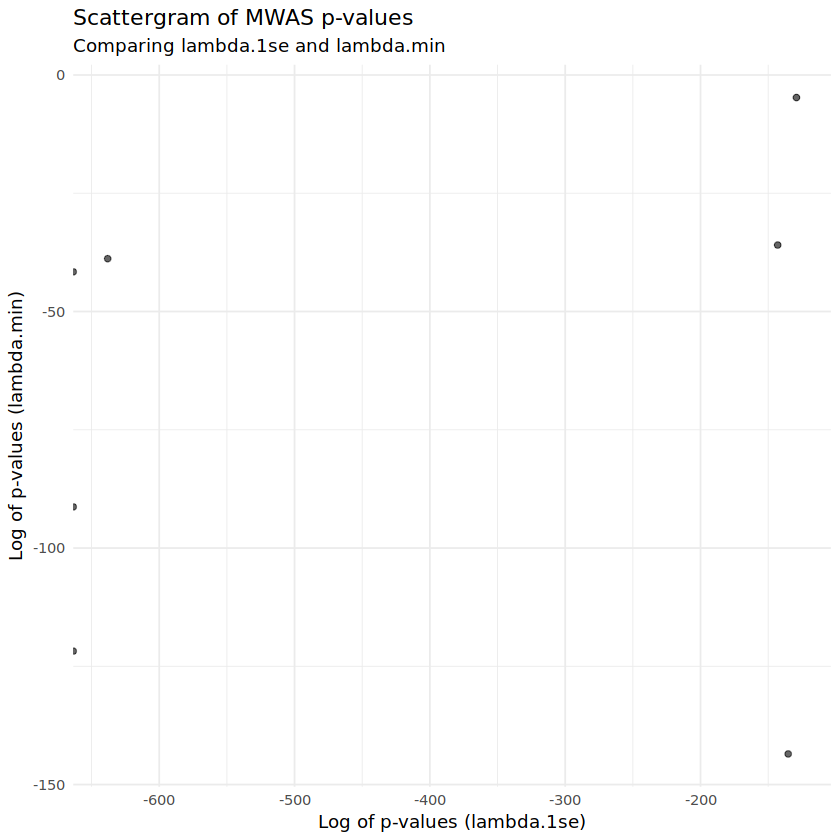

In [102]:
ggplot(df, aes(x = log(pval.lambda.1se), y = log(pval.lambda.min))) +
  geom_point(alpha = 0.6) +
  labs(x = "Log of p-values (lambda.1se)",
       y = "Log of p-values (lambda.min)",
       title = "Scattergram of MWAS p-values",
       subtitle = "Comparing lambda.1se and lambda.min") +
  theme_minimal()